In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
from statsmodels.stats.diagnostic import kstest_normal
from scipy.stats.mstats import winsorize
import holidays
import warnings
warnings.filterwarnings("ignore")

# Missing Values

In [2]:
df = pd.read_excel("C:/Users/htcso/Downloads/EVDS (5).xlsx")

In [3]:
data = df.copy()

In [4]:
data.head()

,Date,Dollar
0,01-01-2020,NaN
1,02-01-2020,5.9507
2,03-01-2020,5.9585
3,04-01-2020,NaN
4,05-01-2020,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1277 non-null   object 
 1   Dollar  877 non-null    float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


In [6]:
data.isnull().sum()

Date        0
Dollar    400
dtype: int64

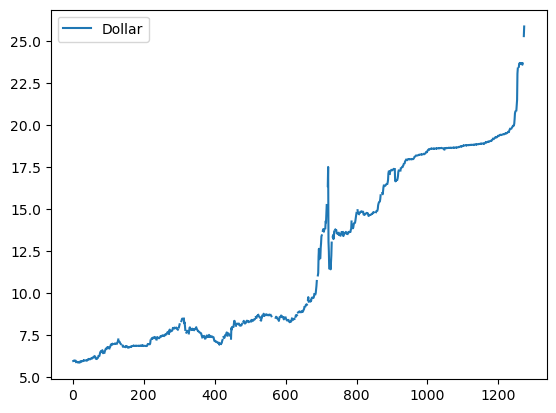

In [7]:
data.plot()
plt.show();

In [8]:
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1277 non-null   datetime64[ns]
 1   Dollar  877 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.1 KB


In [10]:
data["DayName"] = data["Date"].dt.strftime("%A")

In [11]:
data.head()

,Date,Dollar,DayName
0,2020-01-01,NaN,Wednesday
1,2020-01-02,5.9507,Thursday
2,2020-01-03,5.9585,Friday
3,2020-01-04,NaN,Saturday
4,2020-01-05,NaN,Sunday


In [12]:
data = data[["Date", "DayName", "Dollar"]]

In [13]:
data[data["Dollar"].isnull()]["DayName"].value_counts()

DayName
Saturday     182
Sunday       182
Friday        11
Thursday       7
Wednesday      6
Tuesday        6
Monday         6
Name: count, dtype: int64

In [14]:
def isPublicHoliday(date):
    if date in holidays.Turkey():
        return 1
    else: return 0

data["IsPublicHoliday"] = data["Date"].apply(isPublicHoliday)

In [15]:
data.head()

,Date,DayName,Dollar,IsPublicHoliday
0,2020-01-01,Wednesday,NaN,1
1,2020-01-02,Thursday,5.9507,0
2,2020-01-03,Friday,5.9585,0
3,2020-01-04,Saturday,NaN,0
4,2020-01-05,Sunday,NaN,0


In [16]:
data = data[~data["DayName"].isin(["Saturday", "Sunday"])]

In [17]:
data[data["Dollar"].isnull()]["DayName"].value_counts()

DayName
Friday       11
Thursday      7
Wednesday     6
Tuesday       6
Monday        6
Name: count, dtype: int64

In [18]:
data[data["Dollar"].isnull()]["IsPublicHoliday"].value_counts()

IsPublicHoliday
1    36
Name: count, dtype: int64

In [19]:
data.isnull().sum()

Date                0
DayName             0
Dollar             36
IsPublicHoliday     0
dtype: int64

In [20]:
# assuming they are not public holidays and weekends

In [21]:
data2 = df.copy()

In [22]:
data2.head()

,Date,Dollar
0,01-01-2020,NaN
1,02-01-2020,5.9507
2,03-01-2020,5.9585
3,04-01-2020,NaN
4,05-01-2020,NaN


In [23]:
data2["Dollar"].isnull().sum() / len(data2)

0.31323414252153486

In [24]:
data2["Date"] = pd.to_datetime(data2["Date"], format="%d-%m-%Y")

In [25]:
data2.set_index("Date", inplace = True)

In [26]:
data2.head()

,Dollar
Date,
2020-01-01,NaN
2020-01-02,5.9507
2020-01-03,5.9585
2020-01-04,NaN
2020-01-05,NaN


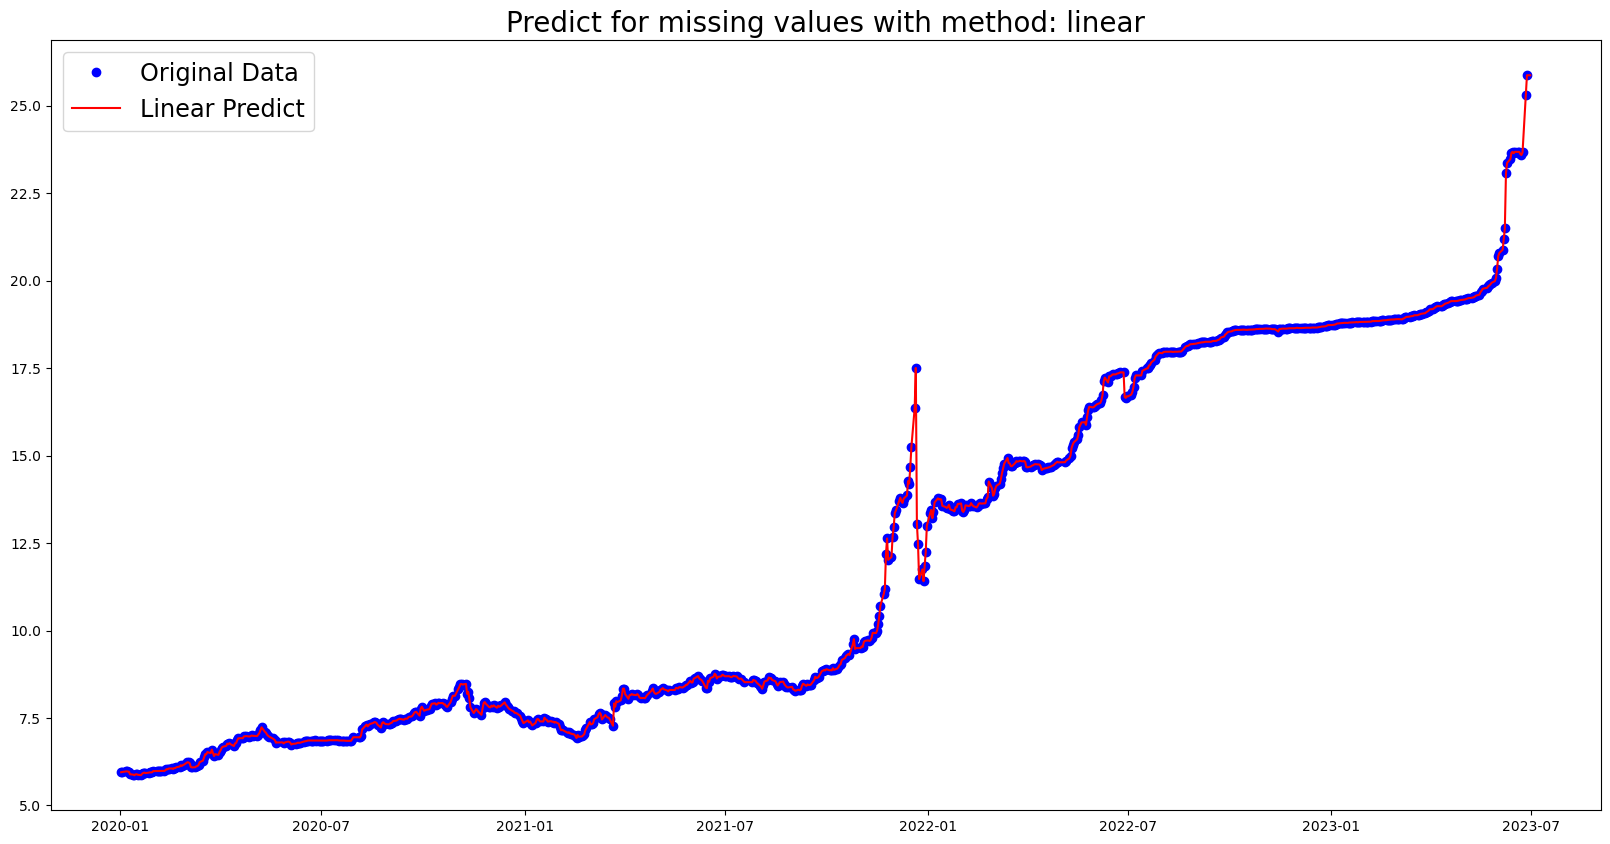

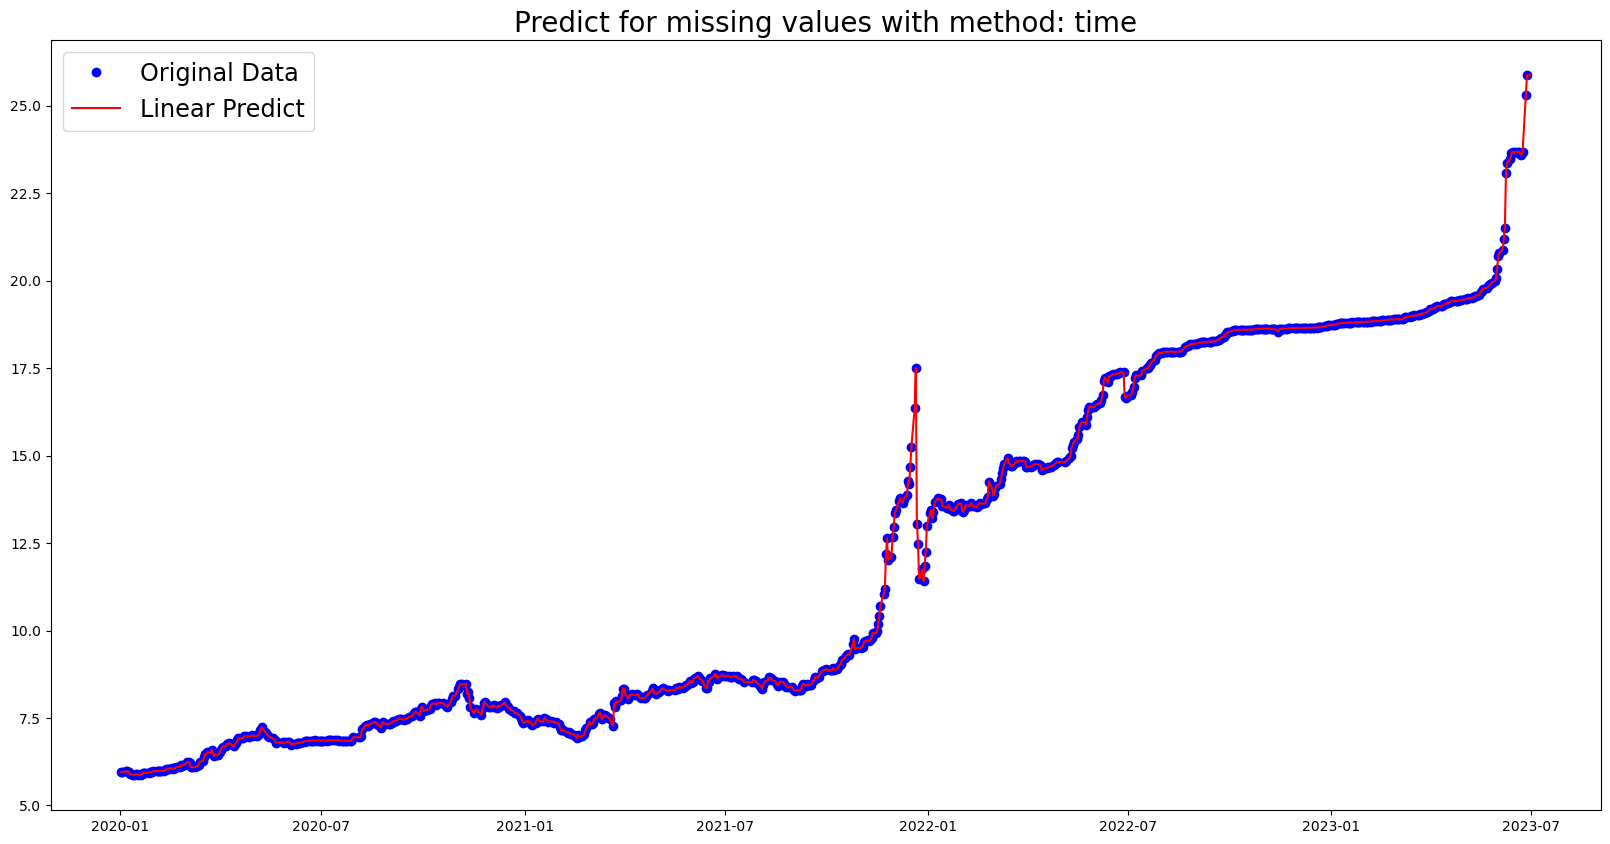

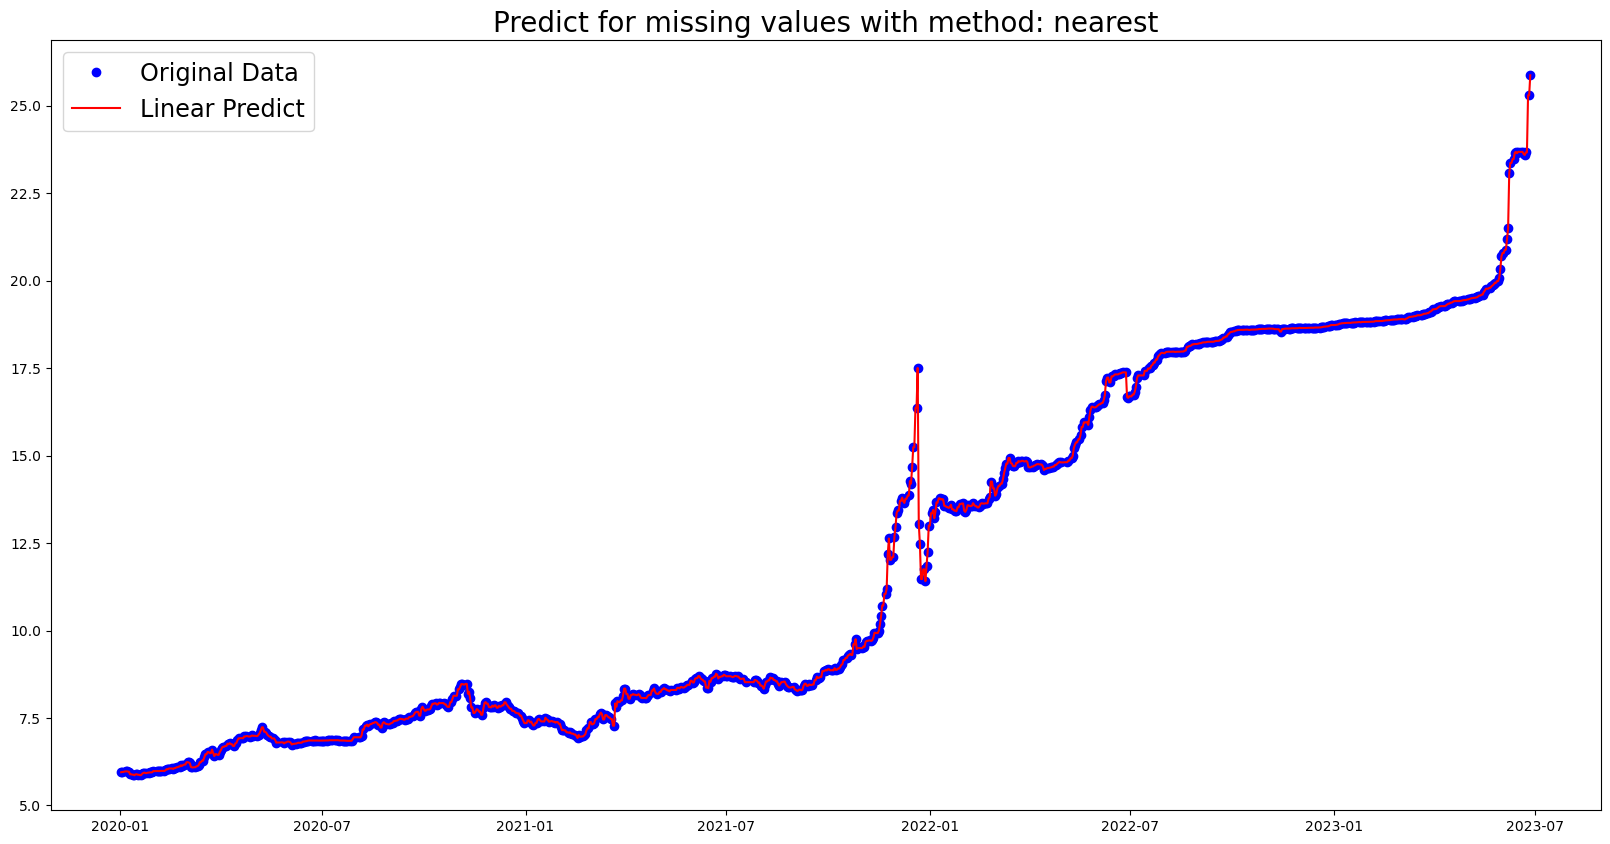

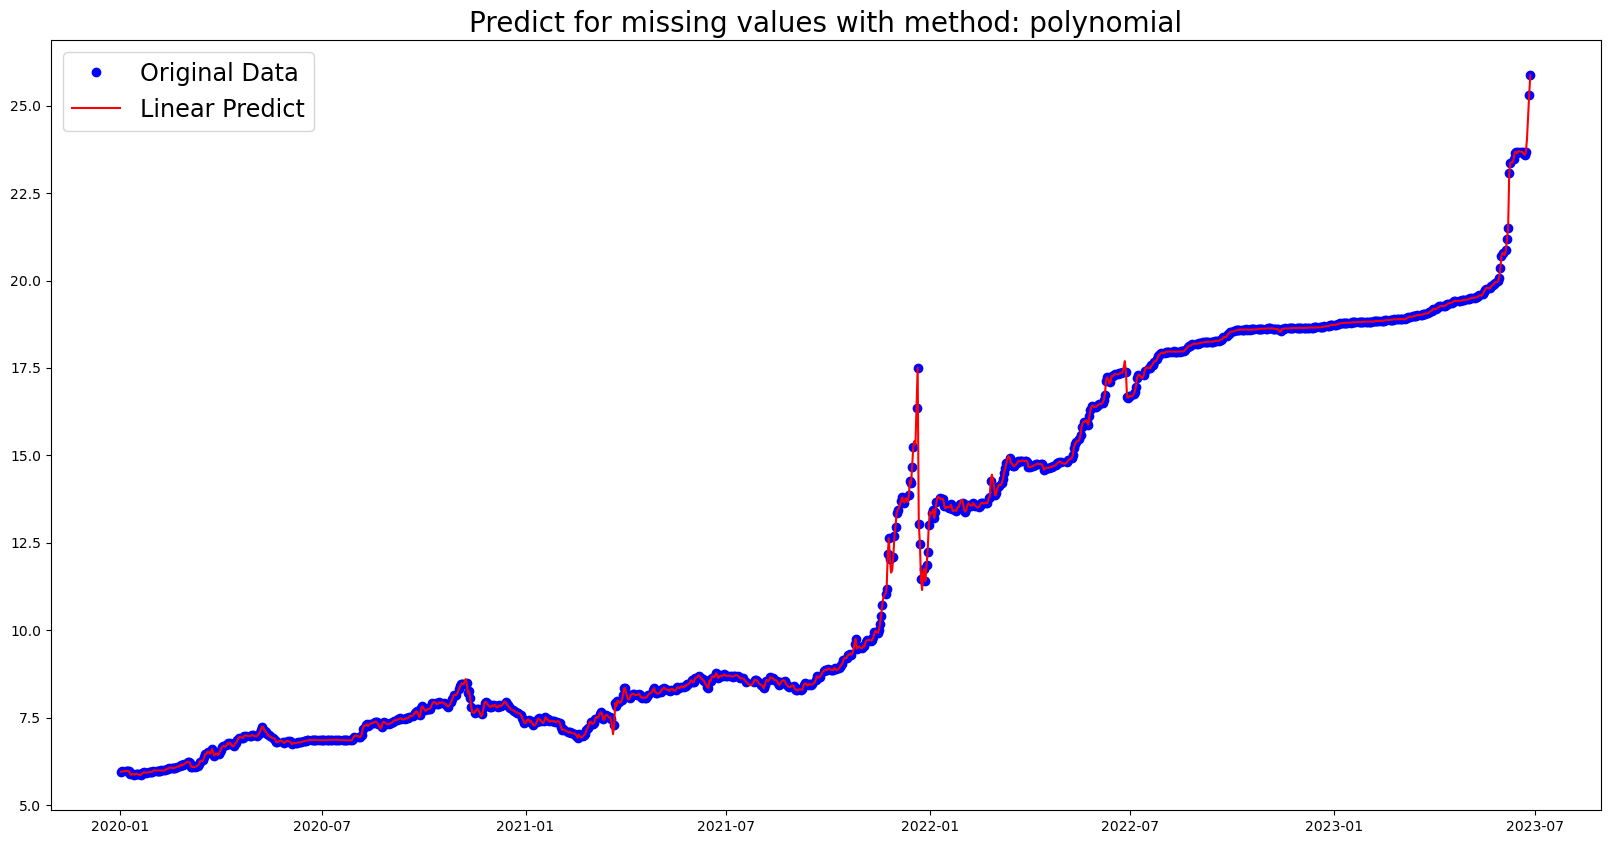

In [27]:
methods = ["linear", "time", "nearest", "polynomial"]

for method in methods:
    
    data2_temp = data2.copy()
    
    if method == "polynomial": 
        data2_temp = data2_temp.interpolate(method = method, order = 2)
    else:
        data2_temp = data2_temp.interpolate(method = method)
        
    plt.figure(figsize = (20,10))
    plt.plot(data2, "bo", label = "Original Data")
    plt.plot(data2_temp, "r-", label = "Linear Predict")
    plt.title(f"Predict for missing values with method: {method}", fontsize = 20)
    plt.legend(fontsize = 'xx-large')
    plt.show();

# Outliers
--------------

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv")

In [29]:
data = df.copy()

In [30]:
data.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [32]:
data["timestamp"] = pd.to_datetime(data["timestamp"], format = "%Y-%m-%d %H:%M:%S")

In [33]:
data.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

In [34]:
data.set_index("timestamp", inplace = True)

In [35]:
data.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [36]:
daily_data = data.resample("D").mean()
daily_data.head()

,value
timestamp,
2014-07-01,15540.979167
2014-07-02,15284.166667
2014-07-03,14794.625000
2014-07-04,11511.770833
2014-07-05,11572.291667


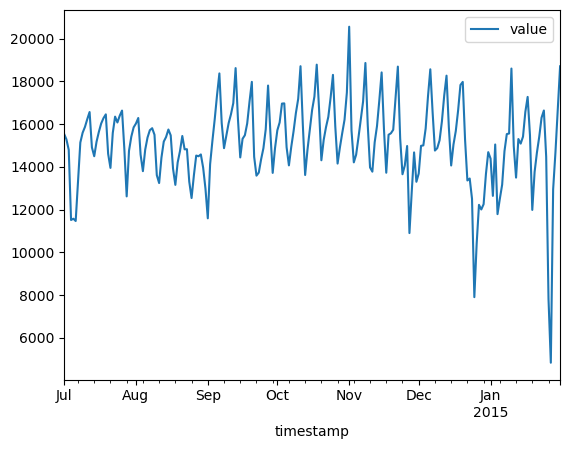

In [37]:
daily_data.plot()
plt.show();

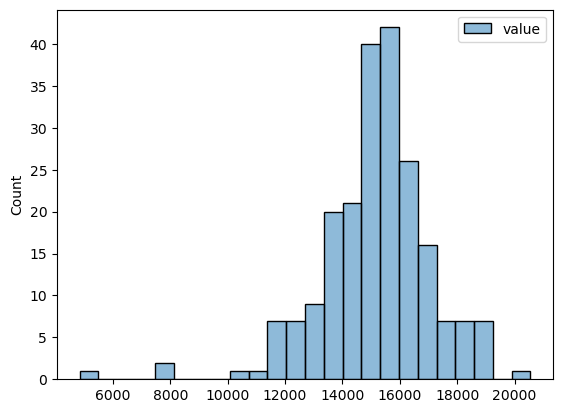

In [38]:
sns.histplot(daily_data)
plt.show();

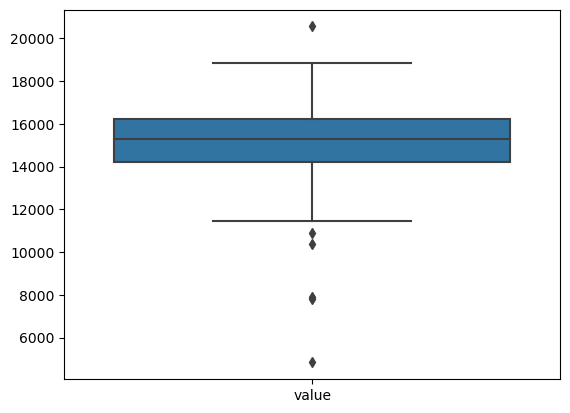

In [39]:
sns.boxplot(daily_data)
plt.show();

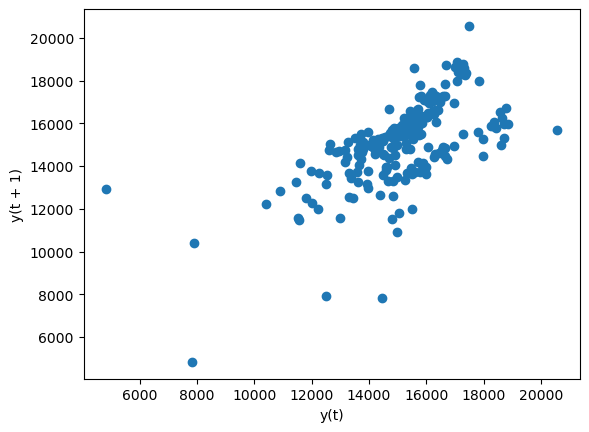

In [40]:
pd.plotting.lag_plot(daily_data)
plt.show();

In [41]:
def outlier(df):
    q1, q3 = np.percentile(df, [25,75])
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    up_limit = q3 + (1.5 * iqr)
    return [df[(df.value > up_limit) | (df.value < low_limit)]]

In [42]:
outliers = outlier(daily_data)
print(outliers)

[                   value
timestamp               
2014-11-01  20553.500000
2014-11-27  10899.666667
2014-12-25   7902.125000
2014-12-26  10397.958333
2015-01-26   7818.979167
2015-01-27   4834.541667]


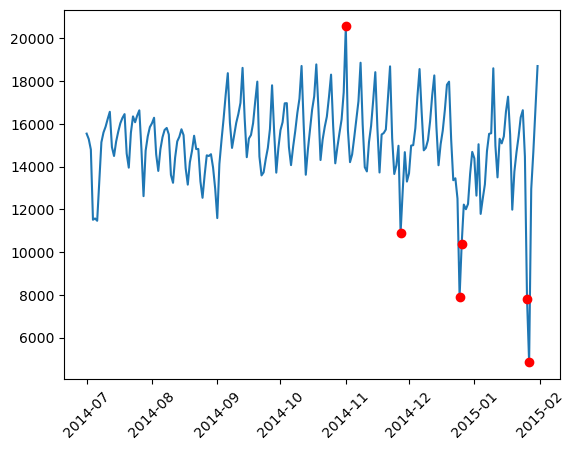

In [43]:
outliers_points = daily_data.loc[outliers[0].index]

plt.plot(daily_data)
plt.plot(outliers_points, "ro")
plt.xticks(rotation = 45)
plt.show();

In [44]:
print(kstest_normal(daily_data["value"]))

(0.0870330433299022, 0.0009999999999998899)


In [45]:
st.norm.ppf(0.75)

0.6744897501960817

In [46]:
def zscore(df, std = 3):
    s = st.norm.ppf(0.75)
    x = s * (df["value"] - df["value"].median())
    y = np.abs(df["value"] - df["value"].median()).median()
    df["Zscore"] = x / y
    outliers = df[(df["Zscore"] < -std) | (df["Zscore"] > std)]
    return outliers

In [47]:
outliers_z = zscore(daily_data)
print(outliers)
print(outliers_z)

[                   value
timestamp               
2014-11-01  20553.500000
2014-11-27  10899.666667
2014-12-25   7902.125000
2014-12-26  10397.958333
2015-01-26   7818.979167
2015-01-27   4834.541667]
                   value    Zscore
timestamp                         
2014-11-01  20553.500000  3.735461
2014-11-27  10899.666667 -3.128742
2014-12-25   7902.125000 -5.260096
2014-12-26  10397.958333 -3.485474
2015-01-26   7818.979167 -5.319215
2015-01-27   4834.541667 -7.441252


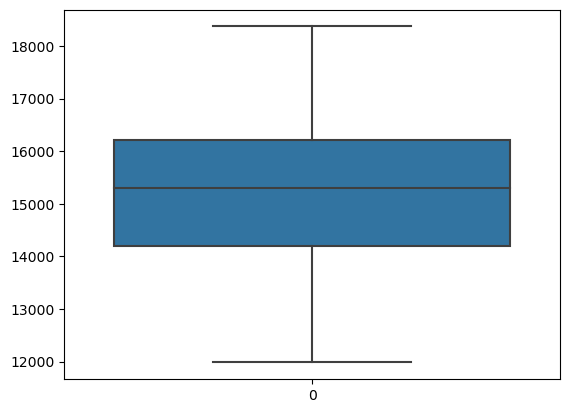

In [48]:
# compress outliers
daily_data2 = daily_data.copy()
daily_data2["value"] = winsorize(daily_data2["value"], (0.05, 0.05))

sns.boxplot(daily_data2["value"])
plt.show();

In [49]:
# with interpolation
daily_data2 = daily_data.copy()
daily_data2.loc[outliers[0].index, "value"] = np.nan

print(daily_data2.isnull().sum())

value     6
Zscore    0
dtype: int64


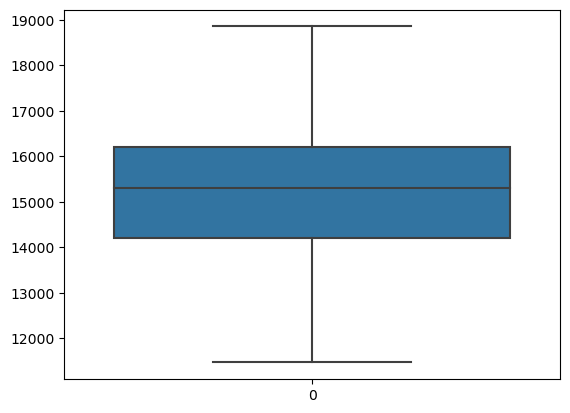

In [50]:
daily_data2["value"] = daily_data2["value"].interpolate()
sns.boxplot(daily_data2["value"])
plt.show();